In [1]:
#read islemlerinin yapimi
import pandas as pd      
veri=pd.read_csv("Auto.csv")
veri.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,21.329712,5.753994,211.084665,110.530351,3102.936102,15.272524,74.683706,1.217252
std,6.699491,1.752340,108.593396,40.045245,881.498780,2.743327,2.913104,0.413036
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,16.000000,4.000000,108.000000,81.000000,2265.000000,13.500000,72.000000,1.000000
50%,20.000000,6.000000,200.000000,98.000000,3012.000000,15.000000,75.000000,1.000000
75%,26.000000,8.000000,305.000000,140.000000,3821.000000,17.000000,77.000000,1.000000
max,43.100000,8.000000,455.000000,230.000000,5140.000000,24.800000,80.000000,2.000000


In [5]:
#KNN algoritmasinin cross validation modeliyle yapimi
from sklearn.model_selection import cross_val_predict as cvp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

X=veri.iloc[:,:-1].values
y=veri["origin"].values
a={"k":[],
   "d":[],
   "h":[],
   "has":[],
   "kes":[]}
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    y_pred  = cvp(knn.fit(X,y), X, y, cv=5) 
    c = confusion_matrix(y, y_pred)
    a["k"].append(i)#en uygun k 20
    a["d"].append((c[0][0]+c[1][1])/(c[0][0]+c[1][1]+c[1][0]+c[0][1]))
    a["h"].append(1-(c[0][0]+c[1][1])/(c[0][0]+c[1][1]+c[1][0]+c[0][1]))
    a["has"].append((c[0][0])/(c[0][0]+c[1][0]))
    a["kes"].append((c[1][1])/(c[1][1]+c[0][1]))
    print("\nK=={} oldugunda modelimizin".format(i))
    print("Dogruluk: ",(c[0][0]+c[1][1])/(c[0][0]+c[1][1]+c[1][0]+c[0][1]))
    print("Hata Orani: ",1-(c[0][0]+c[1][1])/(c[0][0]+c[1][1]+c[1][0]+c[0][1]))
    print("Hassaslik: ",(c[0][0])/(c[0][0]+c[1][0]))
    if(not (c[1][1]+c[0][1])==0):
        print("Keskinlik: ",(c[1][1])/(c[1][1]+c[0][1]))
    print("---------------------------------------------------\n")


K==1 oldugunda modelimizin
Dogruluk:  0.6805111821086262
Hata Orani:  0.31948881789137384
Hassaslik:  0.8085106382978723
Keskinlik:  0.2948717948717949
---------------------------------------------------


K==2 oldugunda modelimizin
Dogruluk:  0.7571884984025559
Hata Orani:  0.24281150159744413
Hassaslik:  0.78839590443686
Keskinlik:  0.3
---------------------------------------------------


K==3 oldugunda modelimizin
Dogruluk:  0.6964856230031949
Hata Orani:  0.30351437699680506
Hassaslik:  0.7862595419847328
Keskinlik:  0.23529411764705882
---------------------------------------------------


K==4 oldugunda modelimizin
Dogruluk:  0.7380191693290735
Hata Orani:  0.2619808306709265
Hassaslik:  0.7781569965870307
Keskinlik:  0.15
---------------------------------------------------


K==5 oldugunda modelimizin
Dogruluk:  0.7188498402555911
Hata Orani:  0.28115015974440893
Hassaslik:  0.7875457875457875
Keskinlik:  0.25
---------------------------------------------------


K==6 oldugunda

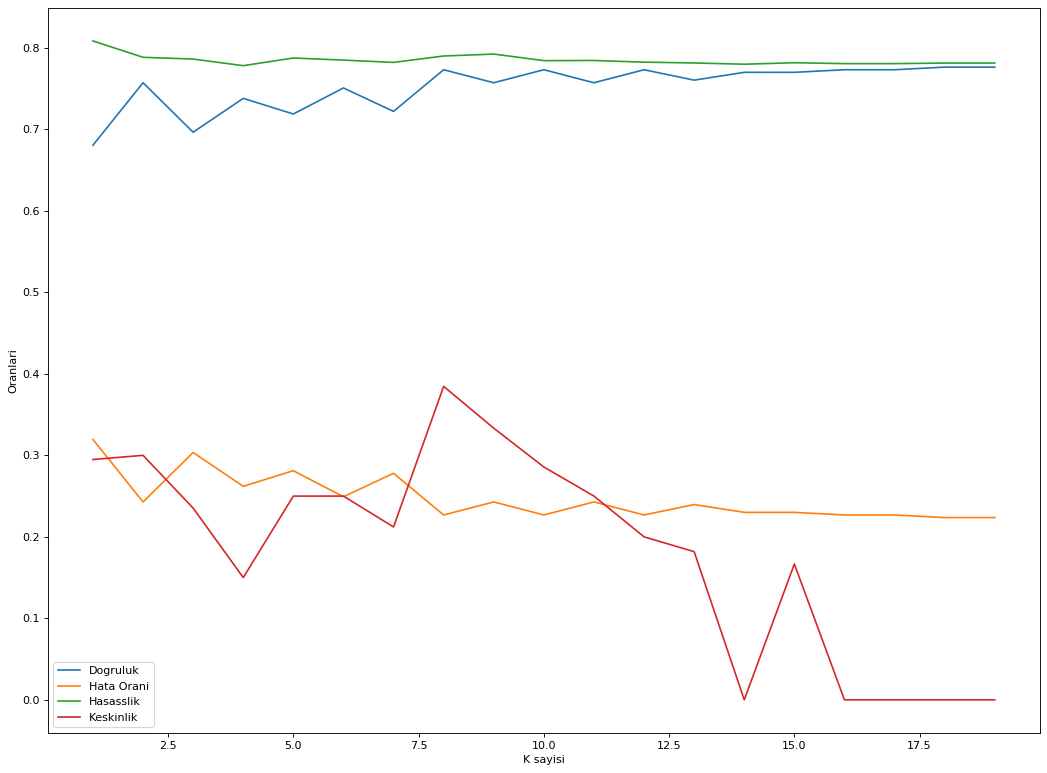

In [7]:
# sonuclarimizin grafige dokulumu
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict(a) 
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
gp1,=plt.plot(df.iloc[:,[0]],df.iloc[:,[1]],label='Dogruluk')
gp2,=plt.plot(df.iloc[:,[0]],df.iloc[:,[2]],label='Hata Orani')
gp3,=plt.plot(df.iloc[:,[0]],df.iloc[:,[3]],label='Hasasslik')
gp4,=plt.plot(df.iloc[:,[0]],df.iloc[:,[4]],label='Keskinlik')
plt.xlabel('K sayisi')
plt.ylabel('Oranlari')
plt.legend(handles=[gp1,gp2,gp3,gp4])
plt.show()